# First Name: Kaung Khant
# Last Name: Naing

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Read in CSV File

In [2]:
sales = pd.read_csv('sales.csv')
sales.head()

,Week Ending Date,Lotto,Instant,Pulltab
0,4/07/2015,1477969,3829822,278080
1,11/07/2015,1459132,3425039,292275
2,18/07/2015,1515182,3963434,313403
3,25/07/2015,1454695,3792073,273735
4,1/08/2015,1495088,4632792,302424


# Data Management

In [3]:
from datetime import datetime
sales['Week Ending Date'] = pd.to_datetime(sales['Week Ending Date'],format='%d/%m/%Y')
sales.head()

,Week Ending Date,Lotto,Instant,Pulltab
0,2015-07-04,1477969,3829822,278080
1,2015-07-11,1459132,3425039,292275
2,2015-07-18,1515182,3963434,313403
3,2015-07-25,1454695,3792073,273735
4,2015-08-01,1495088,4632792,302424


In [4]:
sales.set_index('Week Ending Date', inplace=True)
sales.head()

,Lotto,Instant,Pulltab
Week Ending Date,,,
2015-07-04,1477969,3829822,278080
2015-07-11,1459132,3425039,292275
2015-07-18,1515182,3963434,313403
2015-07-25,1454695,3792073,273735
2015-08-01,1495088,4632792,302424


In [5]:
sales['Pulltab'] = pd.to_numeric(sales['Pulltab'])
print(sales.describe())

              Lotto       Instant        Pulltab
count  1.830000e+02  1.830000e+02     183.000000
mean   2.112038e+06  4.559790e+06  233934.338798
std    1.607643e+06  7.422811e+05   66801.865481
min    1.341382e+06  3.128323e+06  110805.000000
25%    1.546407e+06  3.978167e+06  187110.000000
50%    1.677419e+06  4.459901e+06  229280.000000
75%    2.014369e+06  4.950061e+06  276428.000000
max    1.366234e+07  6.851486e+06  630855.000000


In [6]:
sales.index

DatetimeIndex(['2015-07-04', '2015-07-11', '2015-07-18', '2015-07-25',
               '2015-08-01', '2015-08-08', '2015-08-15', '2015-08-22',
               '2015-08-29', '2015-09-05',
               ...
               '2018-10-27', '2018-11-03', '2018-11-10', '2018-11-17',
               '2018-11-24', '2018-12-01', '2018-12-08', '2018-12-15',
               '2018-12-22', '2018-12-29'],
              dtype='datetime64[ns]', name='Week Ending Date', length=183, freq=None)

# Visualise Time Series

D:\anaconda_new\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Time')

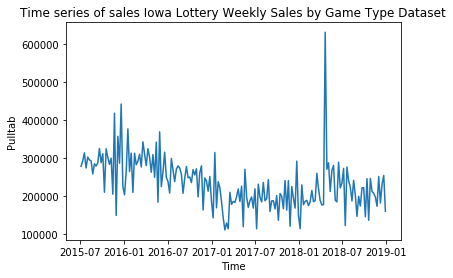

In [7]:
%matplotlib inline
plt.plot(sales ['Pulltab'])
plt.title ('Time series of sales Iowa Lottery Weekly Sales by Game Type Dataset')
plt.ylabel('Pulltab')
plt.xlabel('Time')

In [8]:
sales['Week Ending Date'] = sales.index.month
sales.head()

,Lotto,Instant,Pulltab,Week Ending Date
Week Ending Date,,,,
2015-07-04,1477969,3829822,278080,7
2015-07-11,1459132,3425039,292275,7
2015-07-18,1515182,3963434,313403,7
2015-07-25,1454695,3792073,273735,7
2015-08-01,1495088,4632792,302424,8


# Boxplot

Text(0, 0.5, 'Pulltab')

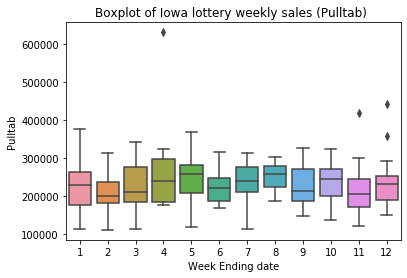

In [9]:
import seaborn as sns
ax = sns.boxplot(data=sales, x='Week Ending Date',y='Pulltab')
plt.title ('Boxplot of Iowa lottery weekly sales (Pulltab) ')
plt.xlabel('Week Ending date')
plt.ylabel('Pulltab')

# 2. Stationarity  - Check

In [10]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
 
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Pulltab')
    plt.ylabel('Time')
    plt.show(block=False)   

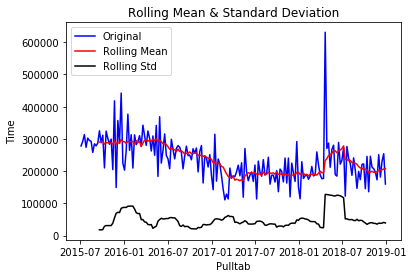

In [11]:
test_stationarity(sales['Pulltab'])

In [12]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
def test_Dickey_Fuller(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [13]:
test_Dickey_Fuller(sales['Pulltab'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.387211
p-value                          0.145379
#Lags Used                       4.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


# Make Time Series Stationary

# Decomposing

Text(0, 0.5, 'Pulltab')

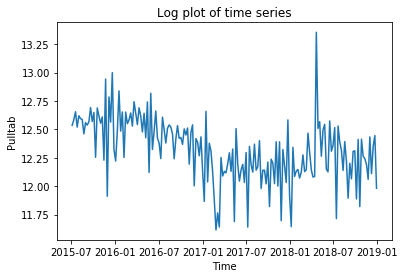

In [14]:
ts_log = np.log(sales['Pulltab'])
plt.plot(ts_log)
plt.title('Log plot of time series')
plt.xlabel('Time')
plt.ylabel('Pulltab')

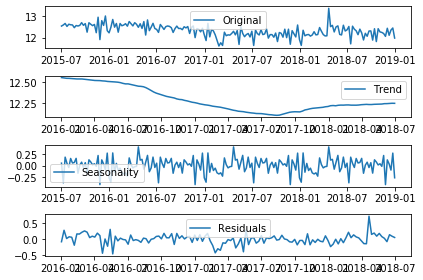

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

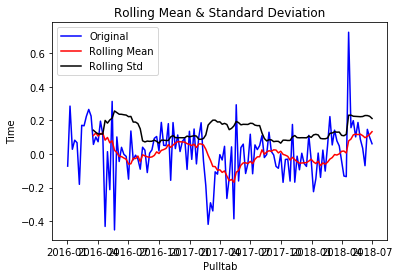

In [16]:
#use only residual data
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [17]:
test_Dickey_Fuller(ts_log_decompose)

Results of Dickey-Fuller Test:
Test Statistic                  -5.602576
p-value                          0.000001
#Lags Used                       1.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


# Plot ACF & PACF chart & find optimal parameter

In [18]:
from statsmodels.tsa.stattools import acf, pacf

In [19]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

D:\anaconda_new\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


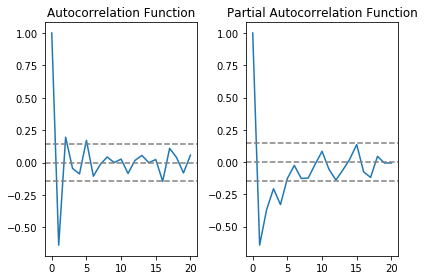

In [20]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Build ARIMA model

In [21]:
from statsmodels.tsa.arima_model import ARIMA

D:\anaconda_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
D:\anaconda_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)


Text(0, 0.5, 'Pulltab')

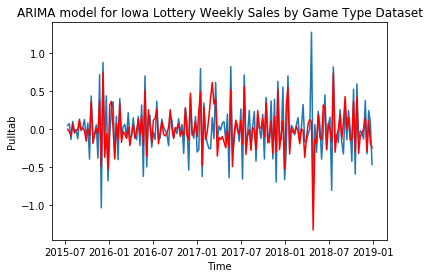

In [22]:
#ARIMA
model = ARIMA(ts_log, order=(1, 1, 1))  #(p,d,q)
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA model for Iowa Lottery Weekly Sales by Game Type Dataset')
plt.xlabel('Time')
plt.ylabel('Pulltab')

# Make predictions

In [23]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

In [24]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [25]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

D:\anaconda_new\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Pulltab')

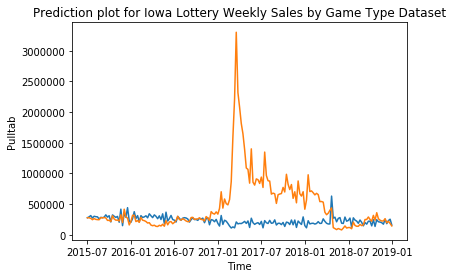

In [26]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(sales['Pulltab'])
plt.plot(predictions_ARIMA)
plt.title('Prediction plot for Iowa Lottery Weekly Sales by Game Type Dataset')
plt.xlabel('Time')
plt.ylabel('Pulltab')